# On commence par regarder notre feedback et récupérer les infos principales

In [135]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.ticker import MultipleLocator

## (1) load pickle file duopoly_feedback.data

In [136]:
with open('duopoly_feedback.data', 'rb') as handle:
    feedback = pickle.load(handle)

C:\Users\yannl\AppData\Local\Temp\ipykernel_11856\3661343792.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  feedback = pickle.load(handle)


In [137]:
print(type(feedback))
feedback.keys()


<class 'dict'>


dict_keys(['history', 'current_simulation', 'cumulative_revenue_current_selling_season', 'factor', 'last_base_price', 'price_today'])

In [138]:
feedback['price_today']

np.float64(18.05)

In [139]:
feedback['history'].head(10)

,simulation,day,season,demand,own_price,competitor_price,remaining_capacity,revenue,cumulative_revenue,factors,factor,price_today
0,d154e3c0-d048-4b01-8732-35e81a443c7c,1.0,1.0,0.0,33.463852,55.514019,80.0,0.000000,0.000000,NaN,1.0,31.790659
1,d154e3c0-d048-4b01-8732-35e81a443c7c,2.0,1.0,1.0,31.790659,33.463852,79.0,31.790659,31.790659,NaN,1.0,30.201126
2,d154e3c0-d048-4b01-8732-35e81a443c7c,3.0,1.0,0.0,30.201126,31.790659,79.0,0.000000,31.790659,NaN,1.0,28.691070
3,d154e3c0-d048-4b01-8732-35e81a443c7c,4.0,1.0,0.0,28.691070,30.201126,79.0,0.000000,31.790659,NaN,1.0,37.742414
4,d154e3c0-d048-4b01-8732-35e81a443c7c,5.0,1.0,0.0,37.742414,28.691070,79.0,0.000000,31.790659,NaN,1.0,35.855293
5,d154e3c0-d048-4b01-8732-35e81a443c7c,6.0,1.0,0.0,35.855293,37.742414,79.0,0.000000,31.790659,NaN,1.0,34.062529
6,d154e3c0-d048-4b01-8732-35e81a443c7c,7.0,1.0,2.0,34.062529,35.855293,77.0,68.125057,99.915716,NaN,1.0,32.359402
7,d154e3c0-d048-4b01-8732-35e81a443c7c,8.0,1.0,0.0,32.359402,34.062529,77.0,0.000000,99.915716,NaN,1.0,30.741432
8,d154e3c0-d048-4b01-8732-35e81a443c7c,9.0,1.0,0.0,30.741432,32.359402,77.0,0.000000,99.915716,NaN,1.0,33.742142
9,d154e3c0-d048-4b01-8732-35e81a443c7c,10.0,1.0,0.0,33.742142,30.741432,77.0,0.000000,99.915716,NaN,1.0,32.055035


In [140]:
df_feedback = feedback['history']


In [141]:
feedback['current_simulation']
L_type = []
for key in feedback.keys() : 
    typ = type(feedback[key])
    print(typ) 
    if typ not in L_type:
        L_type.append([typ, key])
print(L_type)

<class 'pandas.core.frame.DataFrame'>
<class 'str'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.float64'>
<class 'numpy.float64'>
[[<class 'pandas.core.frame.DataFrame'>, 'history'], [<class 'str'>, 'current_simulation'], [<class 'numpy.float64'>, 'cumulative_revenue_current_selling_season'], [<class 'float'>, 'factor'], [<class 'numpy.float64'>, 'last_base_price'], [<class 'numpy.float64'>, 'price_today']]


On va afficher le pourcentage de partie où l'on a vendu toutes nos places

In [142]:
df_feedback = feedback['history']
max_bought = 80 - min(df_feedback.groupby('simulation')['remaining_capacity'].min('remaining_capacity'))
print("Le plus qu'on est vendu est :",max_bought)

Le plus qu'on est vendu est : 55.0


## Load_compt_details

In [143]:
df_comp_details = pd.read_csv('duopoly_competition_details_quentin.csv')
df_comp_details.fillna(0, inplace=True)

df_comp_details['revenue'] = df_comp_details['price'] * df_comp_details['demand']
print(df_comp_details['revenue'].describe())
df_comp_details['unique_selling_season_key'] = df_comp_details.apply( lambda x: 
                    "%s_%s" % (x.competition_id, x.selling_season), axis=1)
df_comp_details.groupby(['competitor_id','competition_id']).agg({
    'price' : 'mean',
    'price_competitor' : 'mean',
    'revenue' : 'sum'
}).round(1)

count    30000.00000
mean        31.58603
std         49.39521
min          0.00000
25%          0.00000
50%          0.00000
75%         55.10000
max        455.20000
Name: revenue, dtype: float64


price  price_competitor   revenue
competitor_id     competition_id                                   
IncredibleDogfish 3WnJwQ           54.9              49.3  269685.8
NoisyMammoth      3JbhUV           55.2              42.7  352729.7
                  fRMRTd           55.1              40.0  325165.4

In [144]:
dfx_rev = df_comp_details.groupby(['unique_selling_season_key']).agg({'revenue':'sum'}).reset_index()
dfx_rev.describe()

,revenue
count,300.000000
mean,3158.603000
std,523.116075
min,1549.100000
25%,2771.150000
50%,3224.200000
75%,3604.925000
max,4204.300000


array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

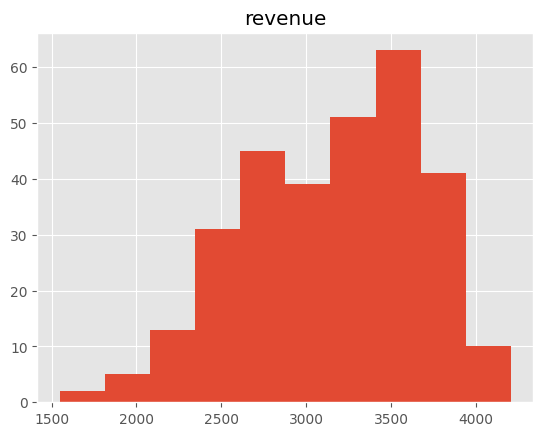

In [145]:
dfx_rev.hist()

In [146]:
df_comp_details.columns

Index(['competition_id', 'selling_season', 'selling_period', 'competitor_id',
       'price_competitor', 'price', 'demand', 'competitor_has_capacity',
       'calculation_duration', 'errors', 'revenue',
       'unique_selling_season_key'],
      dtype='object')

In [147]:
dfp_util = (pd.pivot_table(df_comp_details,
                         values= 'demand',
                         columns= 'unique_selling_season_key',
                         index = 'selling_period').cumsum()/80).round(2)
dfp_util 

unique_selling_season_key,3JbhUV_1,3JbhUV_10,3JbhUV_100,3JbhUV_11,3JbhUV_12,3JbhUV_13,3JbhUV_14,3JbhUV_15,3JbhUV_16,3JbhUV_17,...,fRMRTd_90,fRMRTd_91,fRMRTd_92,fRMRTd_93,fRMRTd_94,fRMRTd_95,fRMRTd_96,fRMRTd_97,fRMRTd_98,fRMRTd_99
selling_period,,,,,,,,,,,,,,,,,,,,,
1,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,...,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01,...,0.00,0.02,0.02,0.00,0.00,0.02,0.00,0.01,0.00,0.00
3,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.01,0.01,0.01,...,0.02,0.04,0.08,0.01,0.00,0.02,0.00,0.02,0.00,0.00
4,0.00,0.00,0.04,0.00,0.00,0.02,0.01,0.01,0.02,0.02,...,0.02,0.04,0.08,0.01,0.00,0.04,0.00,0.02,0.00,0.00
5,0.01,0.00,0.04,0.00,0.00,0.04,0.01,0.05,0.04,0.02,...,0.02,0.04,0.08,0.01,0.01,0.04,0.00,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.88,0.75,0.98,0.91,0.84,1.00,1.00,0.61,0.85,0.76,...,1.00,0.62,0.88,0.68,0.88,0.72,0.89,0.74,0.95,0.85
97,0.91,0.75,1.00,0.96,0.85,1.00,1.00,0.62,0.85,0.76,...,1.00,0.62,0.92,0.68,0.91,0.74,0.89,0.74,0.95,0.85
98,0.94,0.76,1.00,0.99,0.86,1.00,1.00,0.64,0.86,0.78,...,1.00,0.66,0.92,0.68,0.91,0.74,0.89,0.75,0.96,0.89


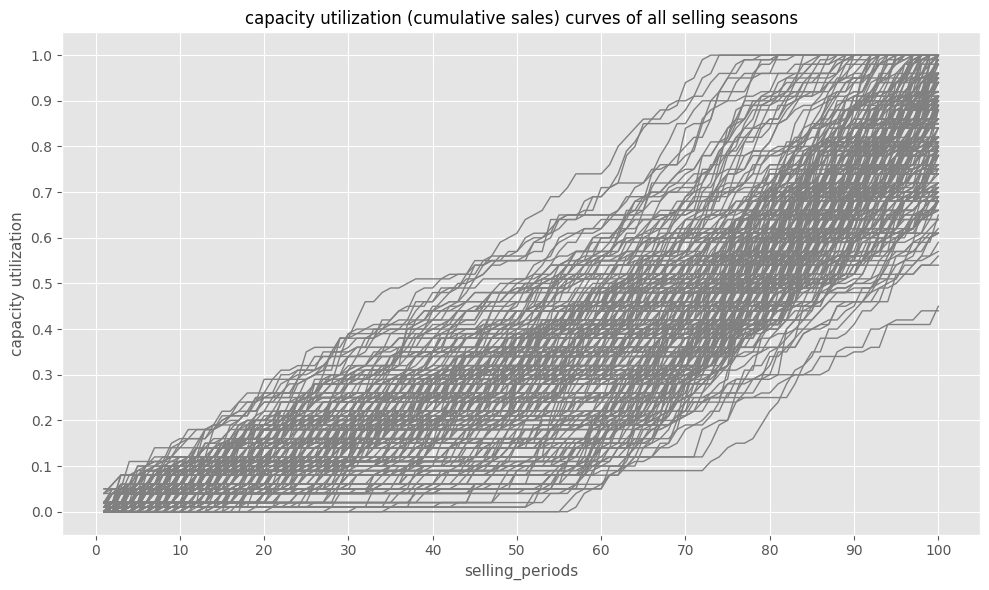

In [148]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(dfp_util.index, dfp_util, color='grey', 
        linestyle='-', linewidth=1, )
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("capacity utilization (cumulative sales) curves of all selling seasons", size=12)
# ax.legend(loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

In [149]:
dfx_rev['unique_selling_season_key']

0        3JbhUV_1
1       3JbhUV_10
2      3JbhUV_100
3       3JbhUV_11
4       3JbhUV_12
          ...    
295     fRMRTd_95
296     fRMRTd_96
297     fRMRTd_97
298     fRMRTd_98
299     fRMRTd_99
Name: unique_selling_season_key, Length: 300, dtype: object

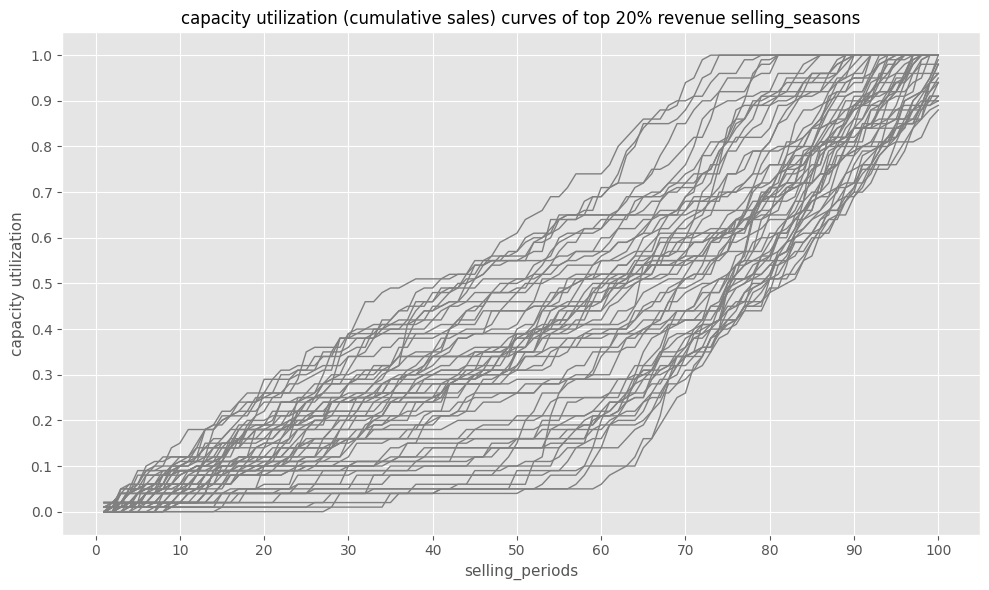

<Axes: xlabel='selling_period'>

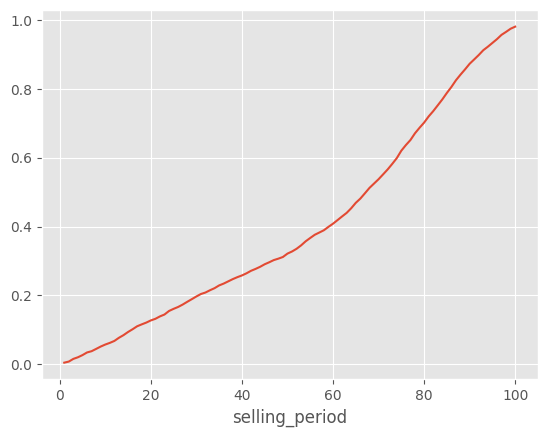

In [150]:
top_selling_seasons = dfx_rev[dfx_rev.revenue>=  dfx_rev.revenue.quantile(0.8) ].unique_selling_season_key.unique()
dfp_top_curves = dfp_util[top_selling_seasons]
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(dfp_top_curves.index, dfp_top_curves, color='grey', 
        linestyle='-', linewidth=1, )
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("capacity utilization (cumulative sales) curves of top 20% revenue selling_seasons", size=12)
# ax.legend(loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

dfp_top_curves['mean_curve'] = dfp_top_curves.apply(lambda r: np.mean(r), axis=1)
dfp_top_curves['mean_curve'].plot()

In [151]:
target_sales_curve = {}
for t in np.arange(1,101,5):
    target = {}
    target['cap_util'] = round(dfp_top_curves.loc[t,'mean_curve'],2)
    target['sold_seats'] = round(dfp_top_curves.loc[t,'mean_curve'] * 80)
    target_sales_curve[str(t)] = target
# save to pickle
with open('target_sales_curve.pkl', "wb") as f:
    pickle.dump(target_sales_curve, f, protocol=pickle.HIGHEST_PROTOCOL)
# load from pickle
with open('target_sales_curve.pkl', 'rb') as f:
            target_curve = pickle.load(f)
def get_target():
    target_curve = {}
    try:
        # load from pickle
        with open('target_sales_curve.pkl', 'rb') as f:
                    target_curve = pickle.load(f)
    except:
        target_curve = {}
    return target_curve

target_curve = get_target()
target_curve

{'1': {'cap_util': np.float64(0.0), 'sold_seats': 0},
 '6': {'cap_util': np.float64(0.03), 'sold_seats': 3},
 '11': {'cap_util': np.float64(0.06), 'sold_seats': 5},
 '16': {'cap_util': np.float64(0.1), 'sold_seats': 8},
 '21': {'cap_util': np.float64(0.13), 'sold_seats': 11},
 '26': {'cap_util': np.float64(0.17), 'sold_seats': 13},
 '31': {'cap_util': np.float64(0.2), 'sold_seats': 16},
 '36': {'cap_util': np.float64(0.23), 'sold_seats': 19},
 '41': {'cap_util': np.float64(0.26), 'sold_seats': 21},
 '46': {'cap_util': np.float64(0.3), 'sold_seats': 24},
 '51': {'cap_util': np.float64(0.33), 'sold_seats': 26},
 '56': {'cap_util': np.float64(0.38), 'sold_seats': 30},
 '61': {'cap_util': np.float64(0.42), 'sold_seats': 33},
 '66': {'cap_util': np.float64(0.48), 'sold_seats': 38},
 '71': {'cap_util': np.float64(0.55), 'sold_seats': 44},
 '76': {'cap_util': np.float64(0.64), 'sold_seats': 51},
 '81': {'cap_util': np.float64(0.72), 'sold_seats': 58},
 '86': {'cap_util': np.float64(0.81), 'so

<Axes: >

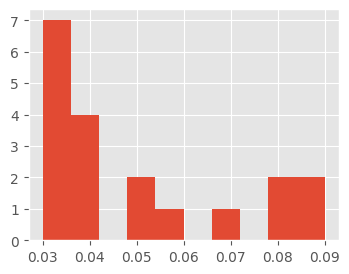

In [152]:
df = pd.DataFrame(columns=['selling_period','perc_sales_target'])
for i in target_curve.keys():
    df.loc[len(df)] = [i, target_curve.get(i).get('cap_util') ]
df['shifted_target'] = df['perc_sales_target'].shift(1)
df['5day_delta'] =  df['perc_sales_target'] - df['shifted_target']
df['5day_delta'].hist(figsize=(4,3))

In [153]:
delta_values = df['5day_delta'].dropna().values
delta_values

array([0.03, 0.03, 0.04, 0.03, 0.04, 0.03, 0.03, 0.03, 0.04, 0.03, 0.05,
       0.04, 0.06, 0.07, 0.09, 0.08, 0.09, 0.08, 0.05])

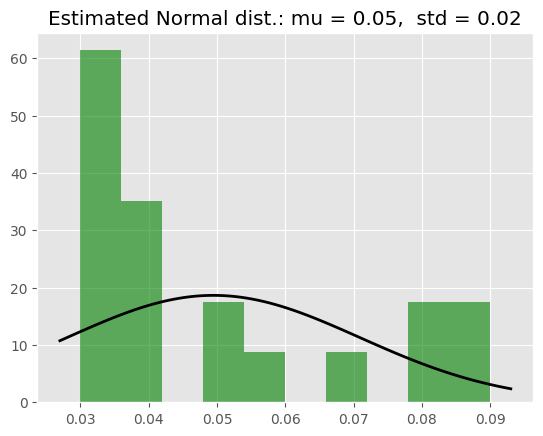

In [154]:
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(delta_values)

# Plot the histogram.
plt.hist(delta_values, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Estimated Normal dist.: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

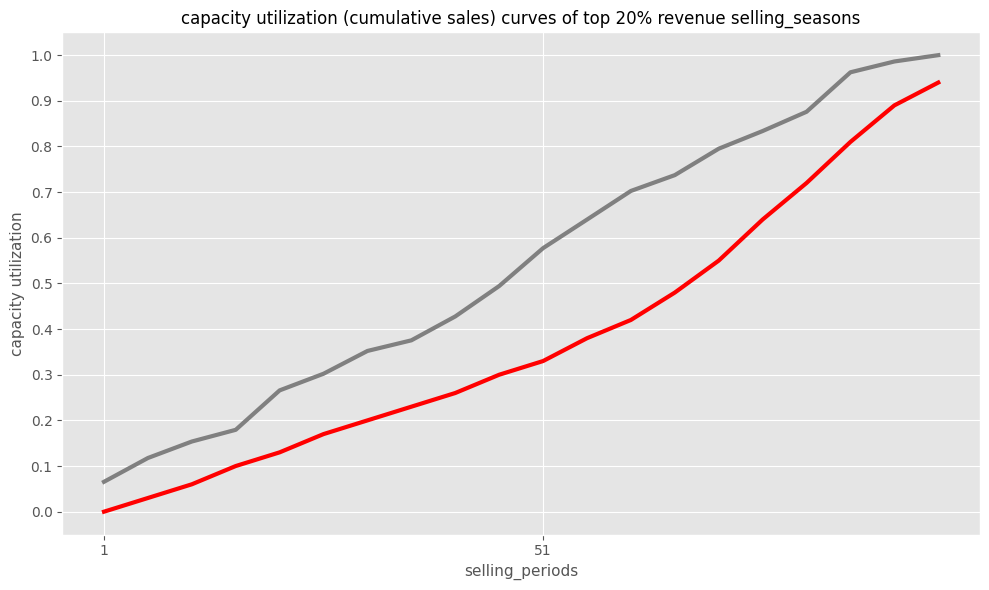

In [167]:
# generate random steps
df['sample_curve_1'] = norm.rvs(loc=mu, scale=std, size=20)
# aggregate the new random price curve
df['sample_curve_1'] = df['sample_curve_1'].cumsum()
# replace any value above 1 with 1, note that .where replaces the not holding False situations
df['sample_curve_1'] = df['sample_curve_1'].where(df['sample_curve_1'] < 1, 1.0)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['selling_period'], df['perc_sales_target'], color='r', 
        linestyle='-', linewidth=3, label='org curve')

ax.plot(df['selling_period'], df['sample_curve_1'], color='grey', 
        linestyle='-', linewidth=3, label='random curve')

ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("capacity utilization (cumulative sales) curves of top 20% revenue selling_seasons", size=12)

ax.grid(True)
fig.tight_layout()

plt.show()